In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import nmrglue as ng

# Read raw data

Reading raw data means we need to do some signal processing too

In [9]:
dic, data = ng.bruker.read("../Hannah_NMR/HR_standards.ID_Hannah_50-_M-acetate.fS.160928/11")

/opt/conda/lib/python2.7/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 10000)

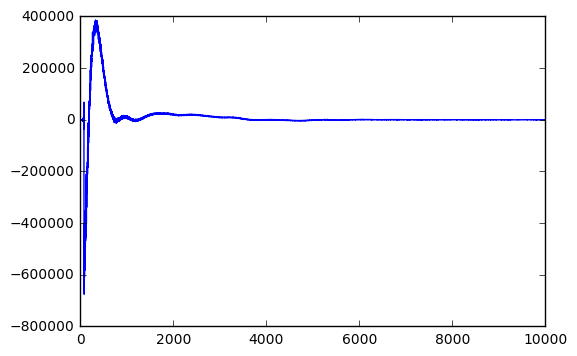

In [3]:
plt.plot(data)
plt.xlim([0, 10000])

The data is still in time domain, so we apply some filtering, perform FFT and do some baseline correction

In [4]:
# remove the digital filter
data = ng.bruker.remove_digital_filter(dic, data)

# process the spectrum
data = ng.proc_base.fft(data)               # Fourier transform
data = ng.proc_base.ps(data, p0=-50.0)      # phase correction
data = ng.proc_base.di(data)                # discard the imaginaries
data = ng.proc_base.rev(data)               # reverse the data

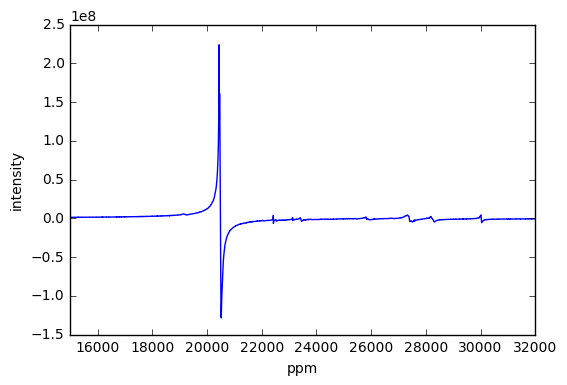

In [5]:
plt.plot(data)
plt.xlim([15000, 32000])
plt.xlabel('ppm')
plt.ylabel('intensity')

The small peak at 30000 is actually the standard (TSP) and should be set as 0 ppm instead.

# Read processed data

Read data that has been preprocessed by naomi using whatever tool (maybe TopSpin or Chenomix)

In [6]:
def plot_spectra(data_list, uc_list, colour_list, saveto=None):
    
    fig = plt.figure(figsize=(20,10))
    for i in range(len(data_list)):

        data = data_list[i]
        colour = colour_list[i]
        
        ax = fig.add_subplot(121)
        ax.plot(data, colour)
        ax.set_xlim([60000, 100000])
        
        ax = fig.add_subplot(122)
        ax.plot(data, colour)
        ax.set_xlim([70000, 80000])
        ax.set_ylim([0, 100000])
    
    plt.tight_layout()
    plt.savefig(saveto)

## Small molecules (CPMG experiments)

In [22]:
dic, data = ng.bruker.read("../Hannah_NMR/HR_standards.ID_Hannah_50-_M-acetate.fS.160928/11")
udic = ng.bruker.guess_udic(dic, data)
uc = ng.fileiobase.uc_from_udic(udic, 0)

print dic.keys(), udic.keys()
print uc.ppm_limits()

['pprog', 'acqus', 'FILE_SIZE'] ['ndim', 0]
(14.720065338393391, -5.315743785155943)


In [36]:
raw_dic, raw_data = ng.bruker.read("../Hannah_NMR/HR_standards.ID_Hannah_50-_M-acetate.fS.160928/11/")
dic, data = ng.bruker.read_pdata("../Hannah_NMR/HR_standards.ID_Hannah_50-_M-acetate.fS.160928/11/pdata/1", 
                                 scale_data=True)

# copy from the raw data dict if not present
if 'acqus' not in dic:
    print 'Getting from raw_dic'
    acqus = raw_dic['acqus']
#     for key in acqus:
#         print key, '------', acqus[key]
    dic['acqus'] = raw_dic['acqus']

udic = ng.bruker.guess_udic(dic, data)
uc = ng.fileiobase.uc_from_udic(udic, 0)

print dic.keys(), udic.keys()
print uc.ppm_limits()
print uc.ppm_scale()
print len(uc.ppm_scale())

TypeError: read_pdata() got an unexpected keyword argument 'scale_data'

In [33]:
first = uc.ppm_scale()[0]
print data[uc(first, 'ppm')]

5679


In [34]:
x = []
y = []
for ppm in uc.ppm_scale():
    x.append(ppm)
    y.append(data[uc(ppm, 'ppm')])
    
x = np.array(x)
y = np.array(y)

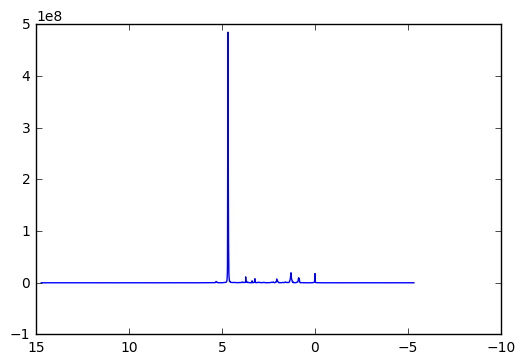

In [35]:
plt.plot(x, y)
# plt.xlim([-1, 6])
# plt.ylim([0, 200000])
plt.gca().invert_xaxis()

In [ ]:
data_list = []
colour_list = ['red', 'green']
uc_list = []

dic, data = ng.bruker.read_pdata("mixed_bloods.ID_F1_red_1.fS.131125/11/pdata/1")
uc = ng.pipe.make_uc(dic, data, dim=0)
data_list.append(data)
uc_list.append(uc)

dic, data = ng.bruker.read_pdata("mixed_bloods.ID_F1_red_1.fS.131125/21/pdata/1")
data_list.append(data)
uc_list.append(uc)

plot_spectra(data_list, uc_list, colour_list, saveto='cpmg.pdf')

## Lipoproteins (NOESY experiments)

In [ ]:
data_list = []
colour_list = ['red', 'green']

dic, data = ng.bruker.read_pdata("mixed_bloods.ID_F1_red_1.fS.131125/10/pdata/1")
data_list.append(data)

dic, data = ng.bruker.read_pdata("mixed_bloods.ID_F1_red_1.fS.131125/20/pdata/1")
data_list.append(data)

plot_spectra(data_list, colour_list, saveto='noesy.pdf')